In [6]:
#Notebook to contain code for modelling a spiking neural network taking angular velocity as an input
import brian2 as b2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#velocity data from simKex
velocity = pd.read_csv('velocity_data.csv')
velocity = velocity.drop('Unnamed: 0', axis='columns')

timesteps = np.arange(0, len(velocity), 1)

In [3]:
velocity

,x,y,z
0,0.000000,0.000000e+00,0.000000e+00
1,0.044391,0.000000e+00,0.000000e+00
2,0.085497,-3.339767e-20,3.499312e-18
3,0.123562,-2.573522e-20,-5.141470e-19
4,0.158811,-9.483297e-21,-1.507714e-18
...,...,...,...
462,0.434307,-2.931919e-19,4.739480e-17
463,0.357785,-1.512783e-19,-1.219278e-17
464,0.286924,-4.318992e-19,3.047147e-17
465,0.221306,-4.786010e-20,-3.663092e-17


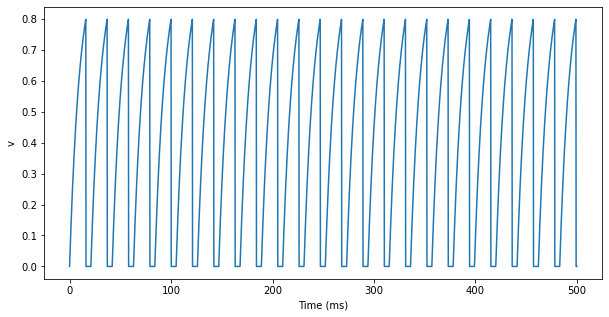

In [16]:
#LIF neuron
#Needed before each sim to prevent error
b2.start_scope()

#constants/hyperparameters
tau = 10*b2.ms
threshold = 1
refractory = 5 * b2.ms
time = 500 * b2.ms
b2.defaultclock.dt = 0.1 * b2.ms


eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''

G = b2.NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', refractory=refractory, method='exact')
M = b2.StateMonitor(G, 'v', record=0)

b2.run(time)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(M.t/b2.ms, M.v[0])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('v')

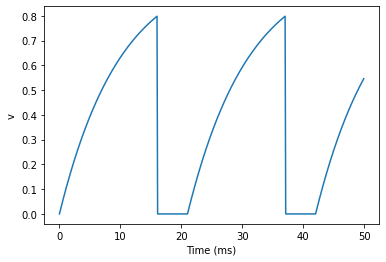

In [13]:
#Speed cell
#Firing rate proportional to speed
#Always firing, with higher speed = more firing, lower/0 speed = less firing (but still some)

#Needed before each sim to prevent error
b2.start_scope()

#constants/hyperparameters
tau = 10*b2.ms
threshold = 0.8
refractory = 5


eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''

G = b2.NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', refractory=refractory*b2.ms, method='exact')
M = b2.StateMonitor(G, 'v', record=0)

b2.run(50*b2.ms)
plt.plot(M.t/b2.ms, M.v[0])
plt.xlabel('Time (ms)')
plt.ylabel('v');